## 목적 : 키워드 분석 시각화

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 라이브러리

In [46]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina' #시각화 결과 선명하게 표시

In [47]:
## colab 한글깨짐현상 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 70 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

### 데이터 불러오기

In [48]:
os.chdir('/content/drive/MyDrive')
path = os.getcwd()
os.makedirs(os.path.join(path, "petitions"), exist_ok = True)

In [49]:
#!unzip /content/drive/MyDrive/open.zip

In [50]:
train = pd.read_csv('/content/drive/MyDrive/petitions/train_data.csv', index_col = 'index')
topic = pd.read_csv('/content/drive/MyDrive/petitions/topic_dict.csv')

In [51]:
train.shape

(45654, 2)

In [52]:
pd.set_option('display.max_colwidth',300)
train.head(3)

title  topic_idx
index                                           
0            인천→핀란드 항공기 결항…휴가철 여행객 분통          4
1      실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화          4
2      이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것          4

In [53]:
train_mt = train.merge(topic, how = 'inner', on = 'topic_idx')
train_mt

title  topic_idx topic
0                인천→핀란드 항공기 결항…휴가철 여행객 분통          4    세계
1          실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화          4    세계
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것          4    세계
3        NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합          4    세계
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망          4    세계
...                                   ...        ...   ...
45649    창원 시내버스 노조 파업 투표 가결…30일 운행 멈춘다종합          2    사회
45650      남친과 함께 잔혹하게 동거인 학대 20대 여성 구속영장          2    사회
45651     1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토          2    사회
45652                   답변하는 배기동 국립중앙박물관장          2    사회
45653  2020 한국인터넷기자상 시상식 내달 1일 개최…특별상 김성후          2    사회

[45654 rows x 3 columns]

min(length)= 4, 국무회의
max(length)= 44, MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매


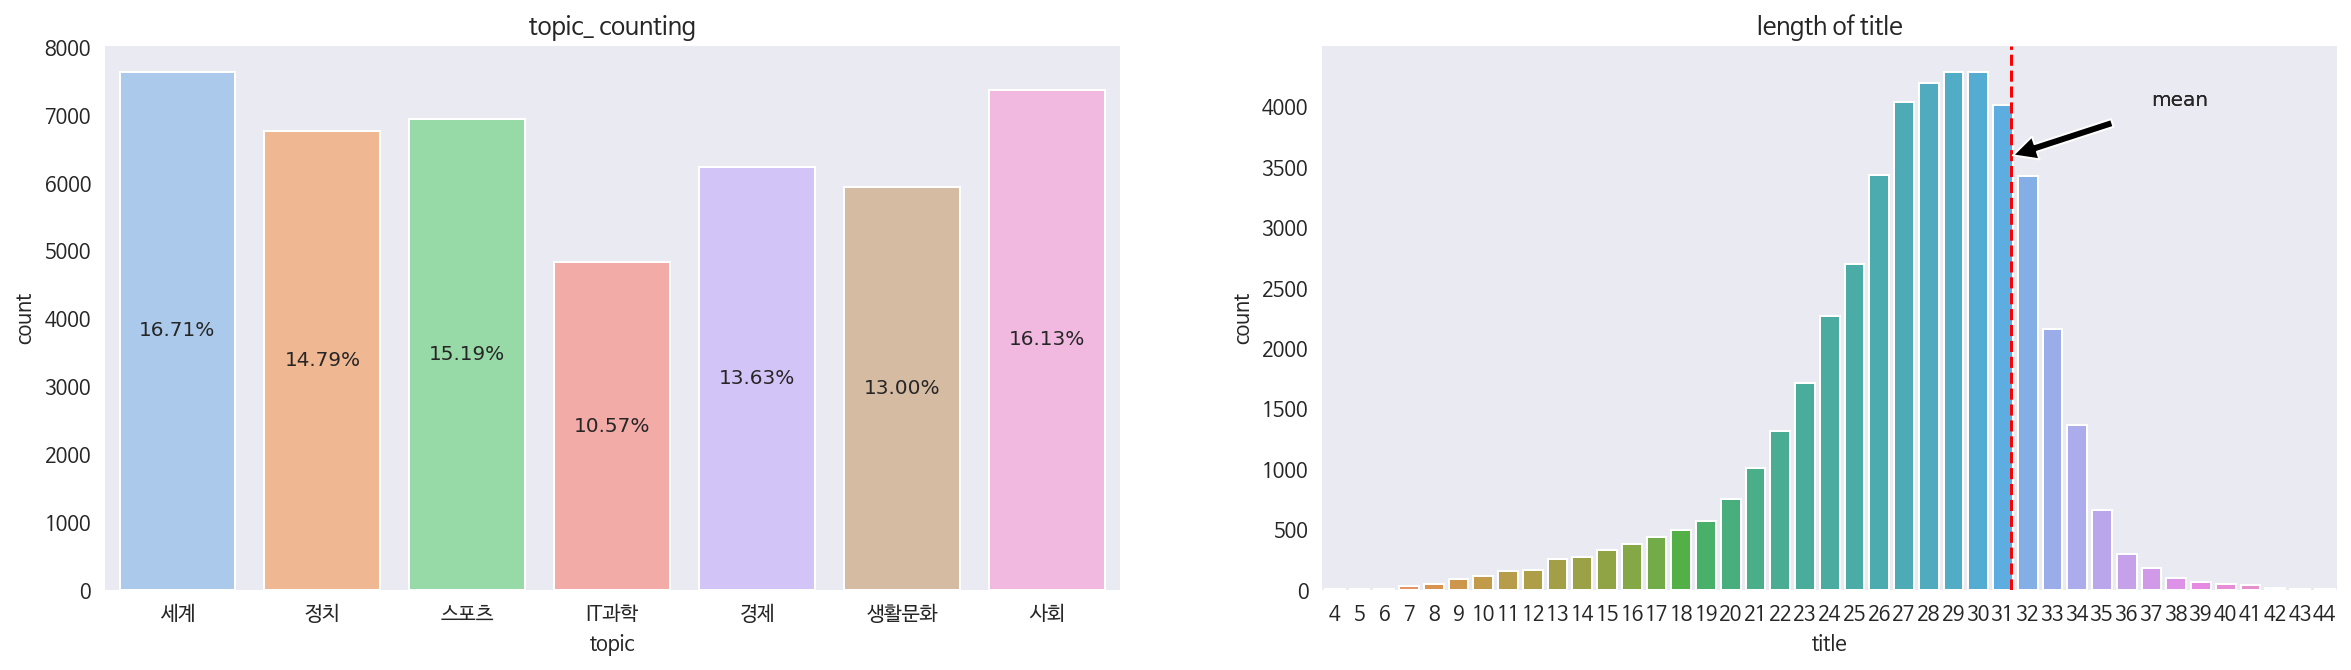

In [54]:
plt.rc('font', family='NanumBarunGothic') 

fig, ax = plt.subplots(1,2, figsize = (20,5))

sns.set_style('dark')
sns.set_palette('pastel')

sns.countplot(x = train_mt.topic, ax = ax[0])
sns.countplot(x = train_mt.title.str.len(), ax=ax[1])

ax[0].set_title("topic_ counting")

#막대그래프 비율 넣기
for p in ax[0].patches:
    left, bottom, width, height = p.get_bbox().bounds #get_bbox().bounds : 막대그래프 정보 가져오기
    ax[0].annotate(f"{(height/train_mt.shape[0])*100:.2f}%", xy = (left+width/2, bottom+height/2), ha = 'center', va = 'center')

ax[1].set_title("length of title")
ax[1].axvline(train_mt.title.str.len().mean(), color = 'r', ls = '--')
ax[1].annotate("mean", xy = (26, 3500), xytext = (33,4000), arrowprops = {'facecolor':'black', 'shrink':0.2})   # 화살표/text 넣기
print(f"min(length)= {train_mt.title.str.len().min()}, {train_mt.title.iloc[train_mt.title.str.len().idxmin()]}")
print(f"max(length)= {train_mt.title.str.len().max()}, {train_mt.title.iloc[train_mt.title.str.len().idxmax()]}")
plt.text(33, 4000, 'mean')
sns.despine(left = True, bottom = True) #축, 테두리 제거(모두제거)
plt.show();

#### 데이터 전처리
- 정규표현식으로 한글 제외한 문자 제거
- 불용어 제거

In [55]:
train_mt.head()

title  topic_idx topic
0          인천→핀란드 항공기 결항…휴가철 여행객 분통          4    세계
1    실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화          4    세계
2    이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것          4    세계
3  NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합          4    세계
4         시진핑 트럼프에 중미 무역협상 조속 타결 희망          4    세계

In [56]:
## stopwords 
url = 'https://www.ranks.nl/stopwords/korean'
from bs4 import BeautifulSoup
import requests
import re

response = requests.get(url, verify = False)
soup = BeautifulSoup(response.text, 'html.parser')

words = str(soup.select('div.panel-body tr')[0])   ## korean stopwords parsing
words = re.split('<br/>|\n', words)  # split on 'html tag <br/> or \n'  
stop_words = [re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', word).strip() for word in words][1:-1] 

#stop_words

In [57]:
regex = '[^ㄱ-ㅎㅏ-ㅣ가-힣A-Z]'

train_mt.title_new = []
for sent in train_mt.title.tolist():
    train_mt.title_new.append(re.sub(regex, ' ', sent).strip())

#train_mt.title_new
train_mt['title_new'] = train_mt.title_new

In [58]:
## mecab 설치
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 1 == \1 ]]
+ echo 'mecab-python is already installed'
mecab-python is already installed
+ echo Done.
Done.


In [59]:
## Okt
#!pip install konlpy
from konlpy.tag import Okt, Mecab

In [60]:
## 형태소 단위로 분리 
mecab = Mecab()

title_morphs = []
title_pos = []

for row in train_mt.title_new:
    title_morphs.append(mecab.morphs(row))
    title_pos.append(mecab.pos(row))

train_mt['title_morphs'] = title_morphs
train_mt['title_pos'] = title_pos

In [61]:
#train_mt

In [62]:
## .morphs > token화 후 1글자 단어는 제거
total_cleaned = []
for row in train_mt['title_morphs']:

    cleaned = []
    for word in row:
        if (word not in stop_words) and (len(word) > 1): 
            cleaned.append(word)

    total_cleaned.append(cleaned)
#print(total_cleaned[0:20])
        
            
train_mt['cleaned_title_morphs'] = total_cleaned

* 단어 빈도수 측정 

In [63]:
by_topic = pd.pivot_table(train_mt, index = 'topic', values = 'cleaned_title_morphs', aggfunc = 'sum')

In [64]:
from collections import Counter

topic_title = []
for i in range(len(by_topic)):
    topic_title.append(list(by_topic.iloc[i].values)[0])
print(topic_title[-1])  # 마지막행(정치) 

['김영남', '민족', '위상', '과시', '뜨거운', '분위기', '적극', '행정', '추진', '전략', '성과', '공유', '대회', '참석', '이낙연', '총리', '대통령', '합의', '소녀', '언급', '선동', '민주', '국회의원', '보선', '후보', '공모', '신청', '현행', '헌법', '지방', '자치', '경제', '민주', '개념', '강화', '트럼프', '유조선', '공격', '사소', '이란', '충돌', '우려', '수위', '조절', '이희호', '여사', '경호', '만료', '당분간', '경호', '유지', '통일', '농구', '오늘', '친선', '남북', '대결', '김정은', '관전', '가능', '회담', '완전히', '무시', '대북', '확성기', '방송', '전면', '재개', '접경', '긴장', '차분', '종합', '대통령', '북미', '합의', '이행', '국제', '사회', '협력', '시대', '위해', '헌신', '미사일', '발사', '정부', '개성', '공단', '체류', '인원', '축소', '종합', '대통령', '총선', '닷새', '평가', '평소', '보다', '발언', '한미', '수석대표', '협의', '위해', '출국', '이도훈', '안철수', '천정배', '박지원', '회동', '입당', '삼고초려', '대통령', '아세안', 'APEC', '일정', '오늘', '저녁', '귀국', '개국', '파견', '하루', '강제노동', '촛불', '민심', '받들', '국정', '운영', '촛불', '대통령', '한국', '가짜', '뉴스', '규제', '개인', '미디어', '통제', '입법화', '반기', '우상호', '박지원', '상견례', '내놓', '양보', '지역구', '후보', '재산', '김병관', '대통령', '금주', '안보', '경제', '이중', '위기', '극복', '고삐', '죈다', '여야', '원내', '대표단', '방미', '추진'

In [65]:
most_common = [dict(Counter(topic_title[i]).most_common(50)) for i in range(len(by_topic))]   ### Counter ==> dict() 해줘야 나중에 시각화 하기 편해
#most_common
## 빈도수 높은 단어의 결과물을 보고 불용어 다시 제거

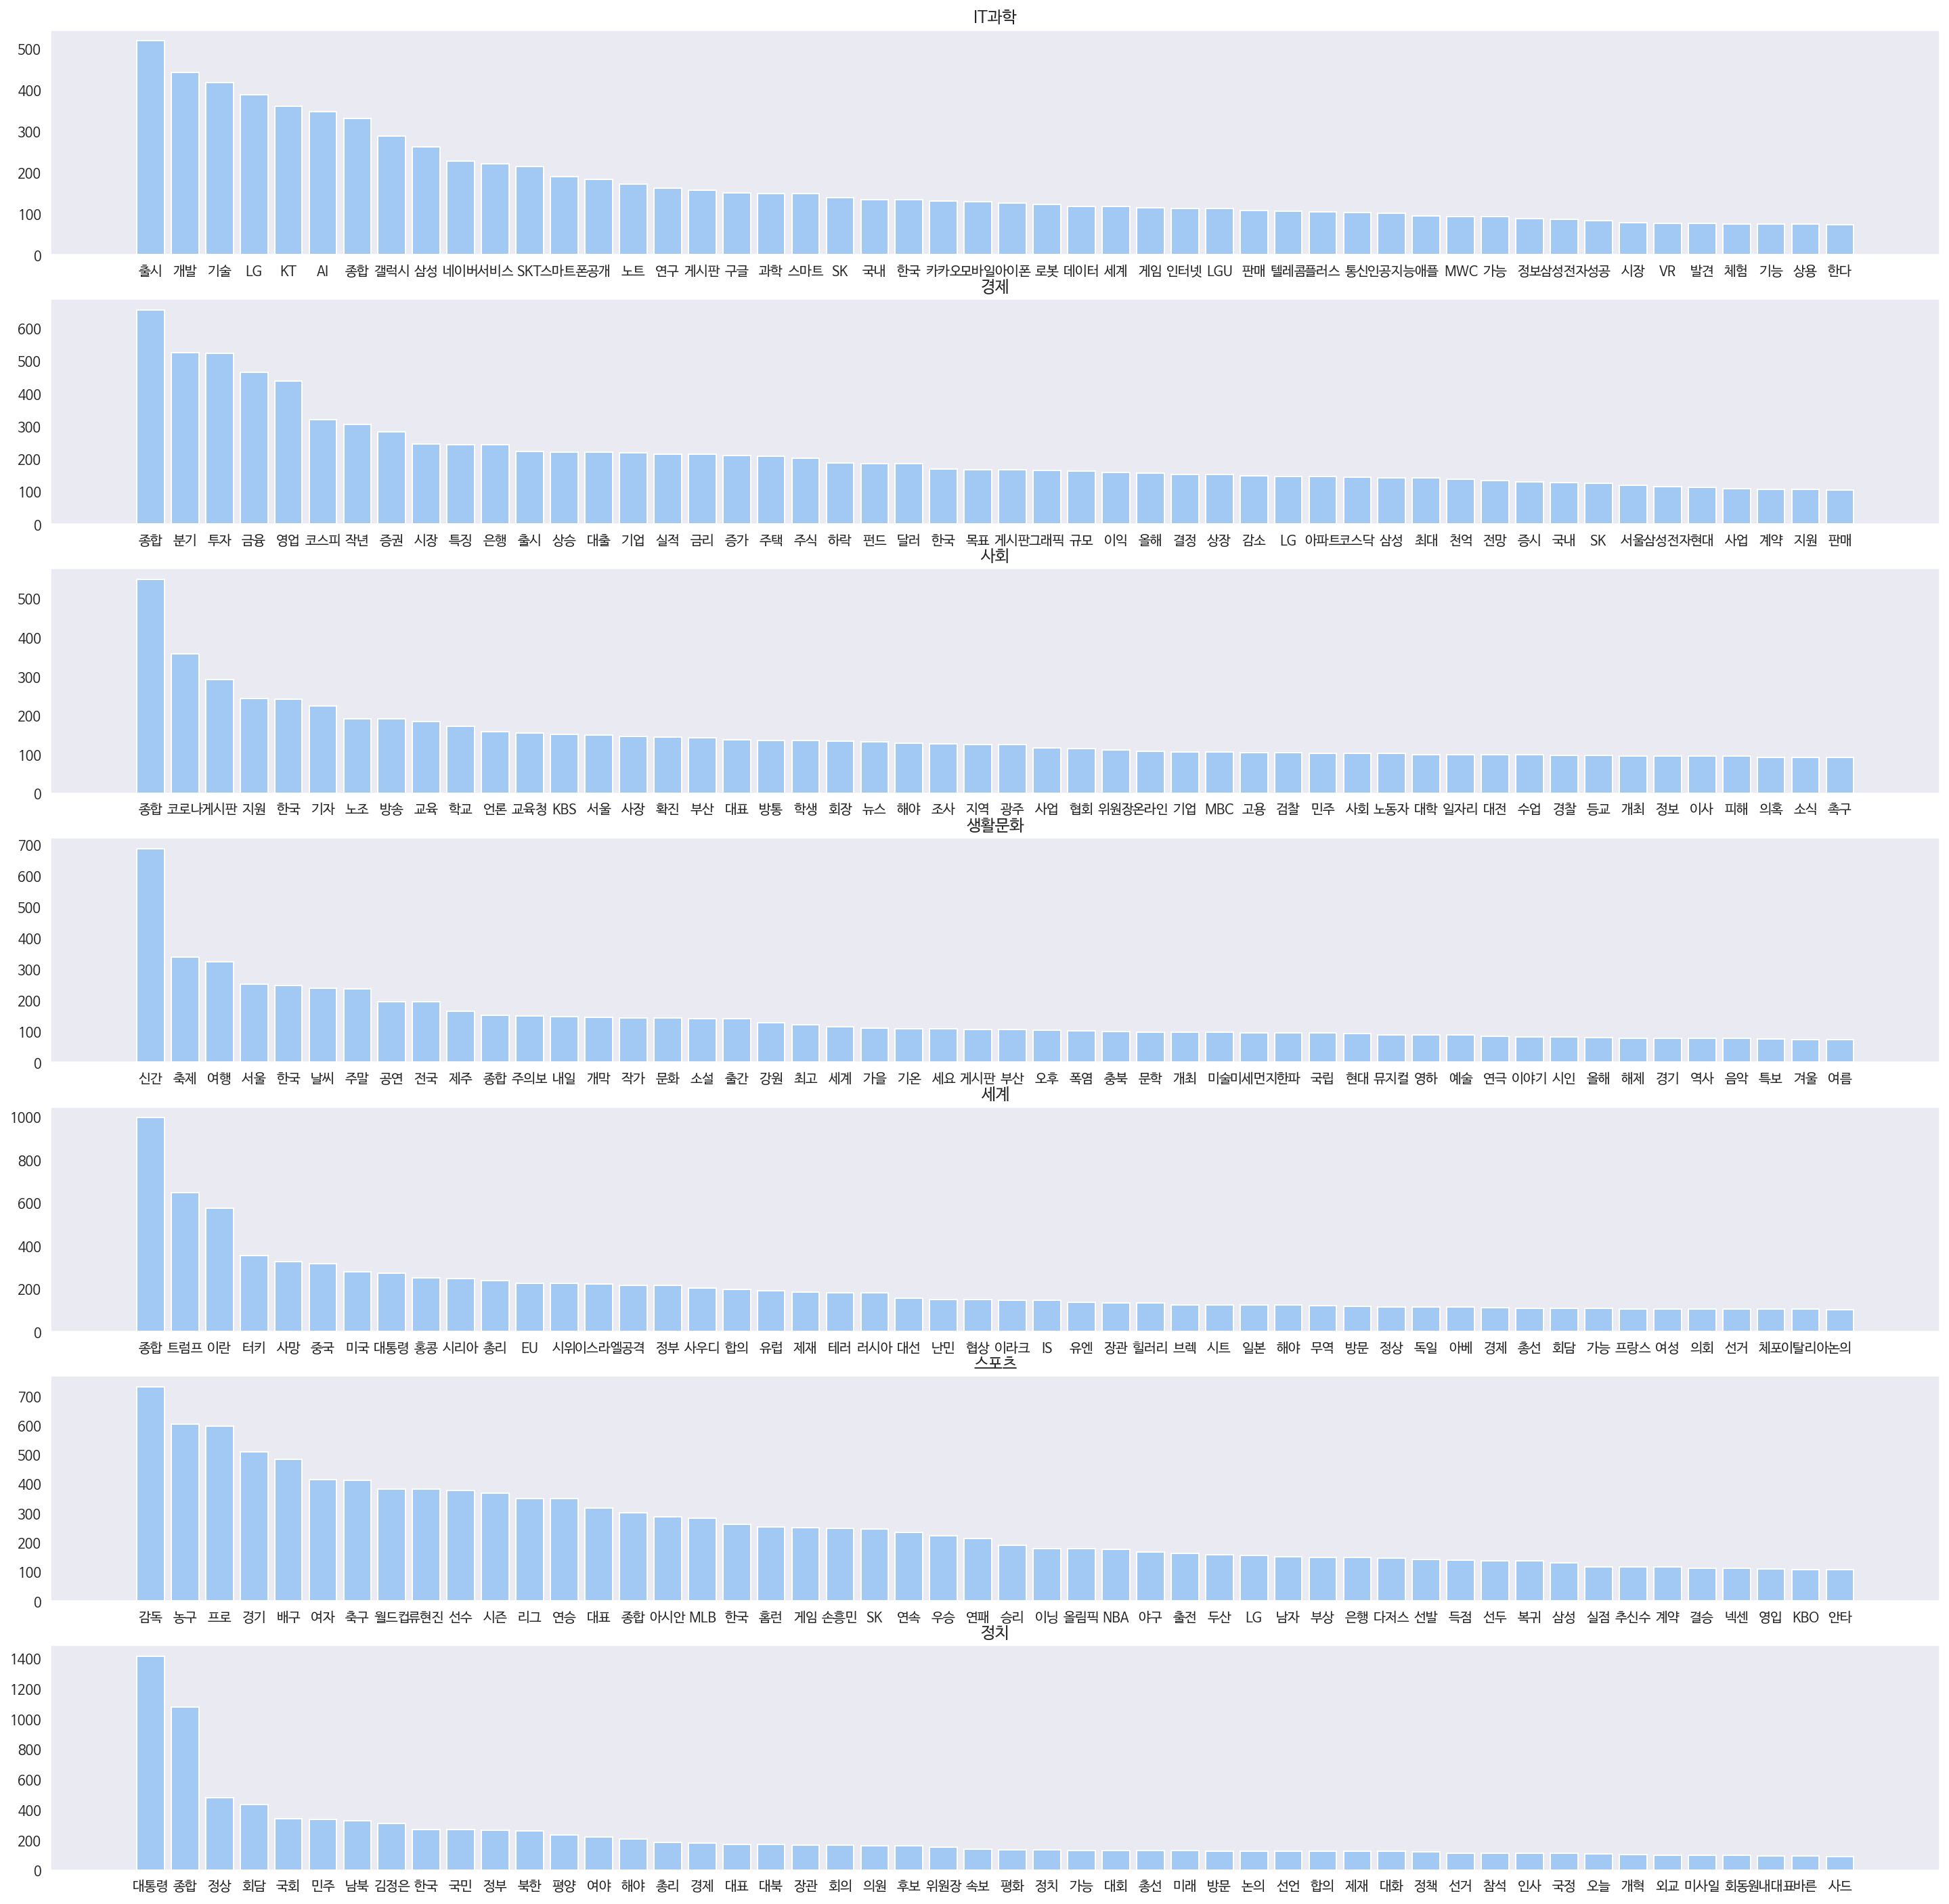

In [66]:
# 단어빈도 시각화
plt.rc('font', family='NanumBarunGothic') 

fig, axes = plt.subplots(7,1, figsize = (25,25))
ax = axes.flatten()
for i, row in enumerate(most_common):
    ax[i].bar(row.keys(),row.values())
    ax[i].set_title(f'{by_topic.iloc[i].name}')

plt.show();

In [67]:
## 워드클라우드 - 빈도 시각화
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


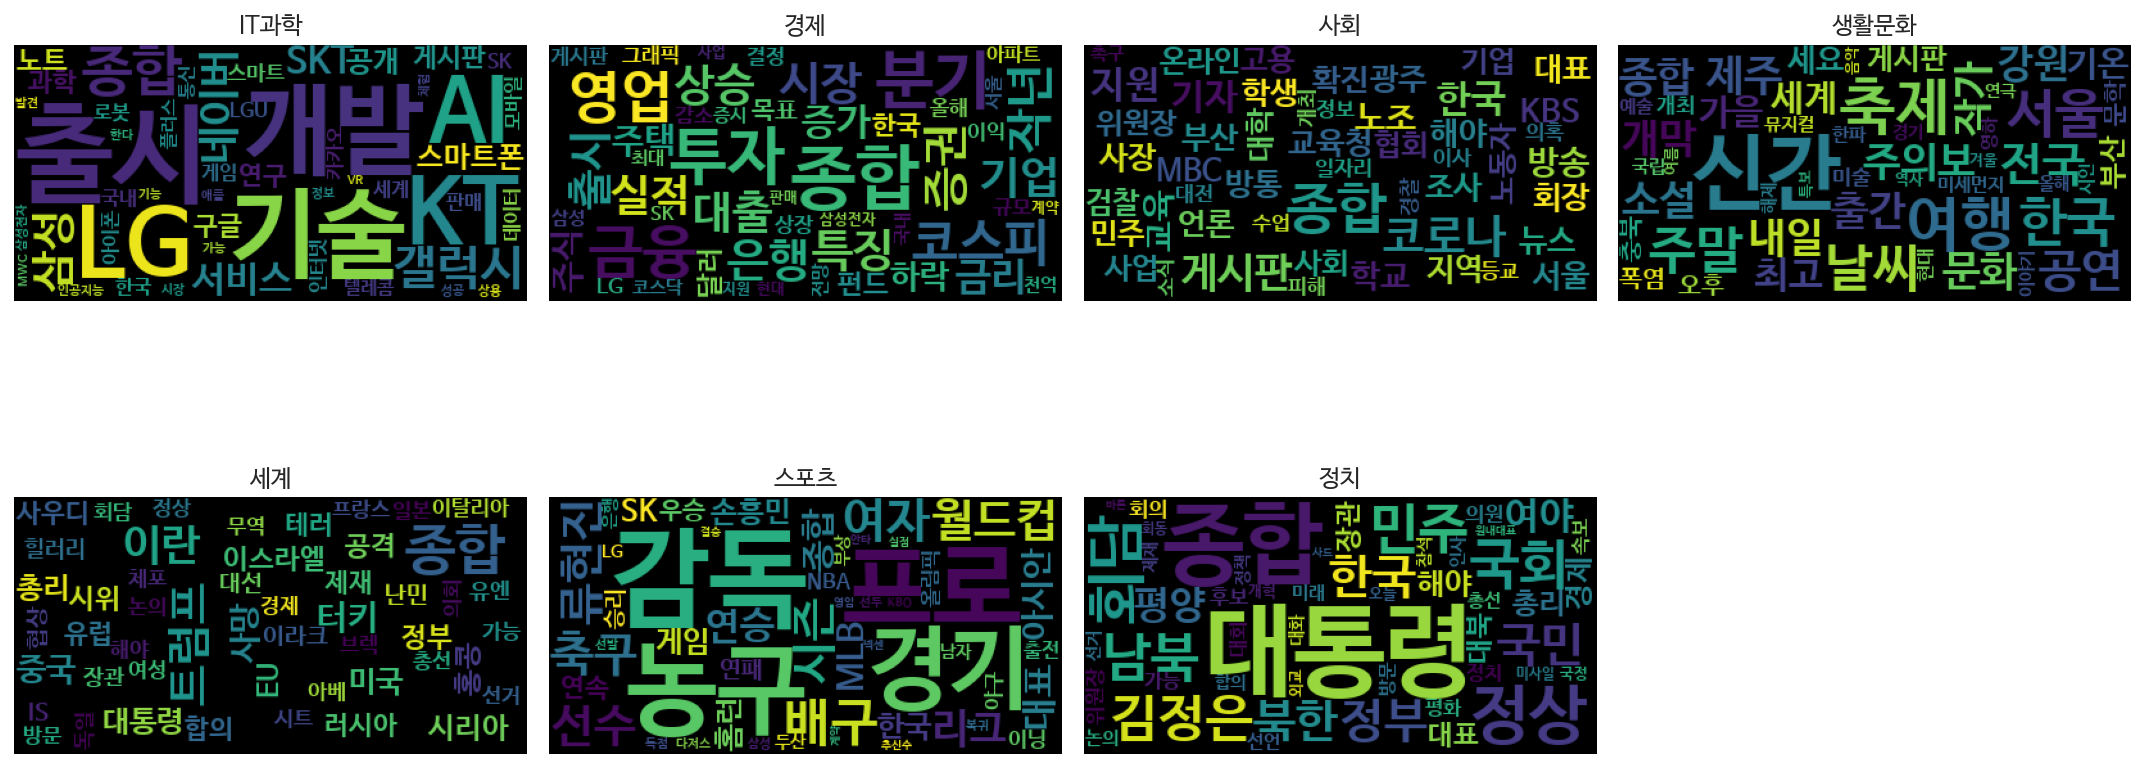

In [68]:
from wordcloud import WordCloud
wc = WordCloud(background_color = 'black', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf')

fig, axes = plt.subplots(2,4,figsize = (15,7))  
ax = axes.flatten()
for i, row in enumerate(most_common):
    wc.generate_from_frequencies(row)
    ax[i].axis('off')
    ax[i].imshow(wc)
    ax[i].set_title(f"{by_topic.index[i]}")


ax[-1].set_visible(False)  ## 남는 subplot 지우기
plt.tight_layout()
plt.show()

In [69]:
stopwords = ['종합', '대통령','한국','이란','하는','억원','만에','만에','해야','올해','게시판','정부','분기','작년','오늘','한다','보다','내달','전국','내년','내일','기자','최고']

stop_2 = list(set(stopwords))
## 코로나는 빈도수는 높지만 사회 topic에서만 포함되어 불용어에 포함하지 않음

## 불용어 추가한 뒤 다시 데이터 정제
total_cleaned = []
total_cleaned_w = []
for row in train_mt['title_pos']:

    cleaned = []
    cleaned_w = []
    for word, pos in row:
        if (word not in stop_words) and (word not in stop_2) and (len(word) > 1): 
            cleaned.append((word, pos))
            cleaned_w.append(word)

    total_cleaned.append(cleaned)
    total_cleaned_w.append(cleaned_w)
        
train_mt['cleaned_title_morphs'] = total_cleaned
train_mt['cleaned_title_w'] = total_cleaned_w

In [70]:
## 다시 단어들의 빈도수 확인
by_topic = pd.pivot_table(train_mt, index = 'topic', values = 'cleaned_title_w', aggfunc = 'sum')

topic_title = []
for i in range(len(by_topic)):
    topic_title.append(list(by_topic.iloc[i].values)[0])

most_common2 = [dict(Counter(topic_title[i]).most_common(50)) for i in range(len(by_topic))] 
#most_common2

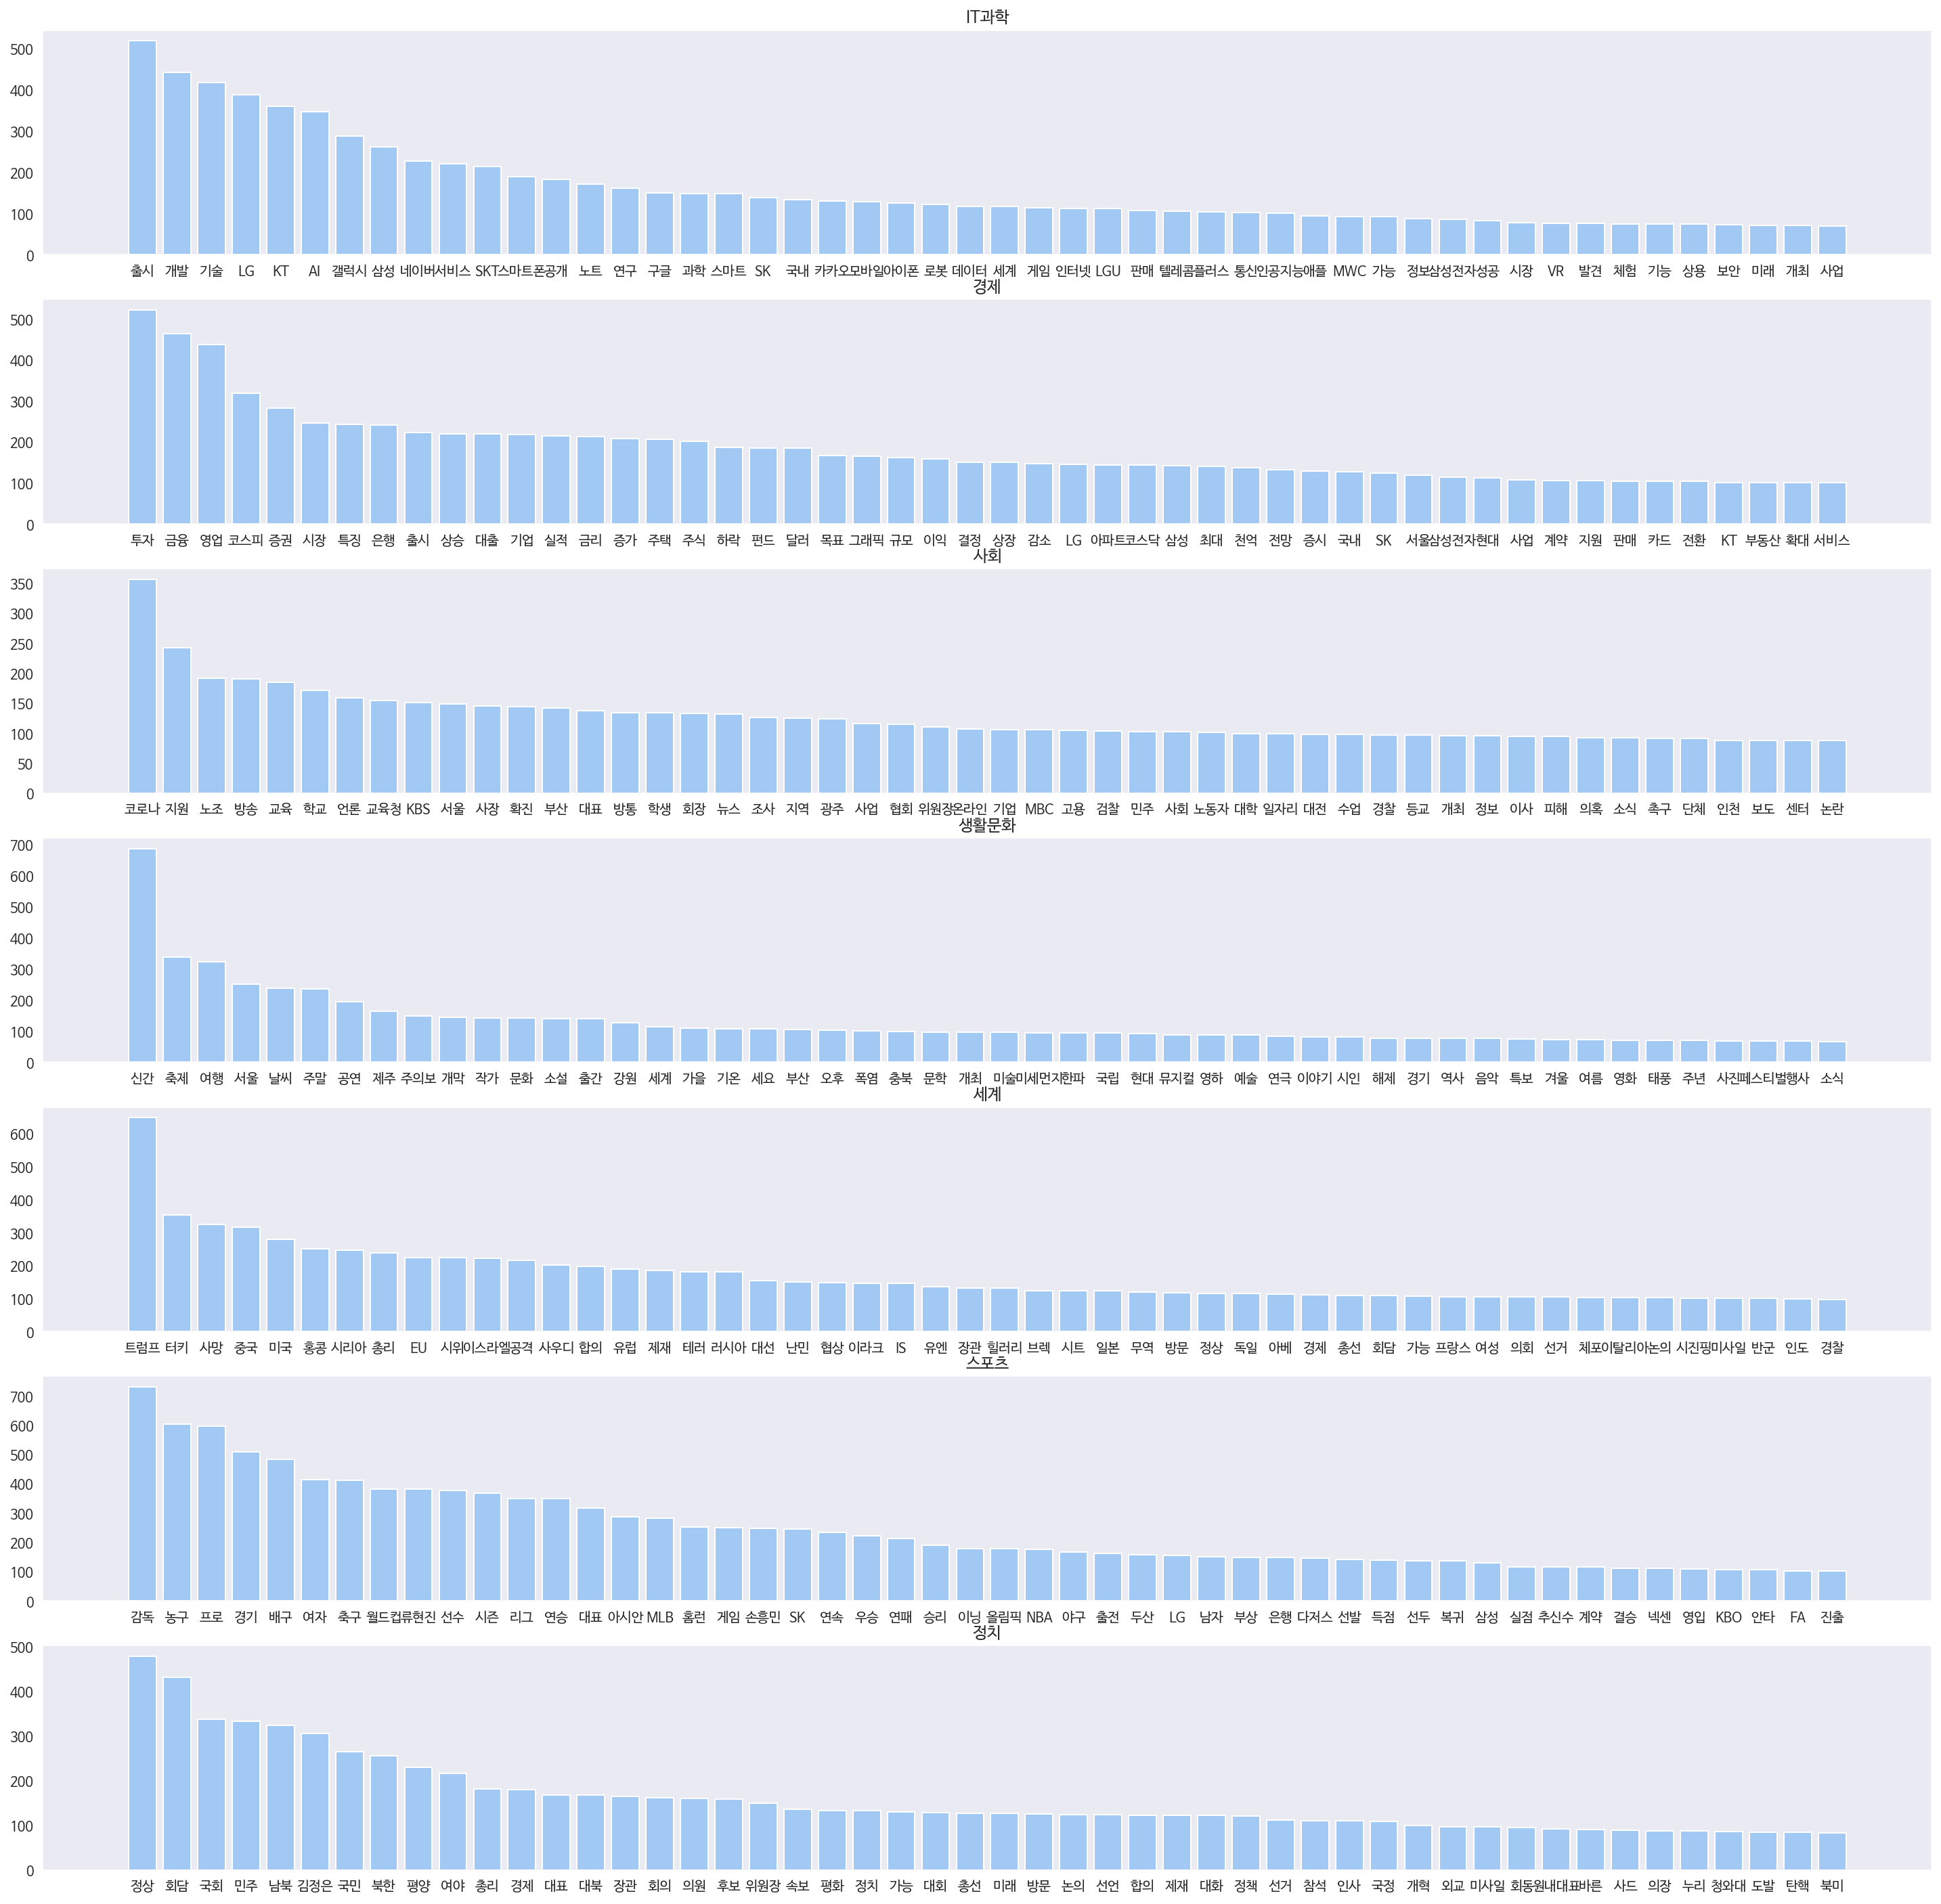

In [71]:
# 단어빈도 시각화
plt.rc('font', family='NanumBarunGothic') 

fig, axes = plt.subplots(7,1, figsize = (25,25))
ax = axes.flatten()
for i, row in enumerate(most_common2):
    ax[i].bar(row.keys(),row.values())
    ax[i].set_title(f'{by_topic.iloc[i].name}')

plt.show();

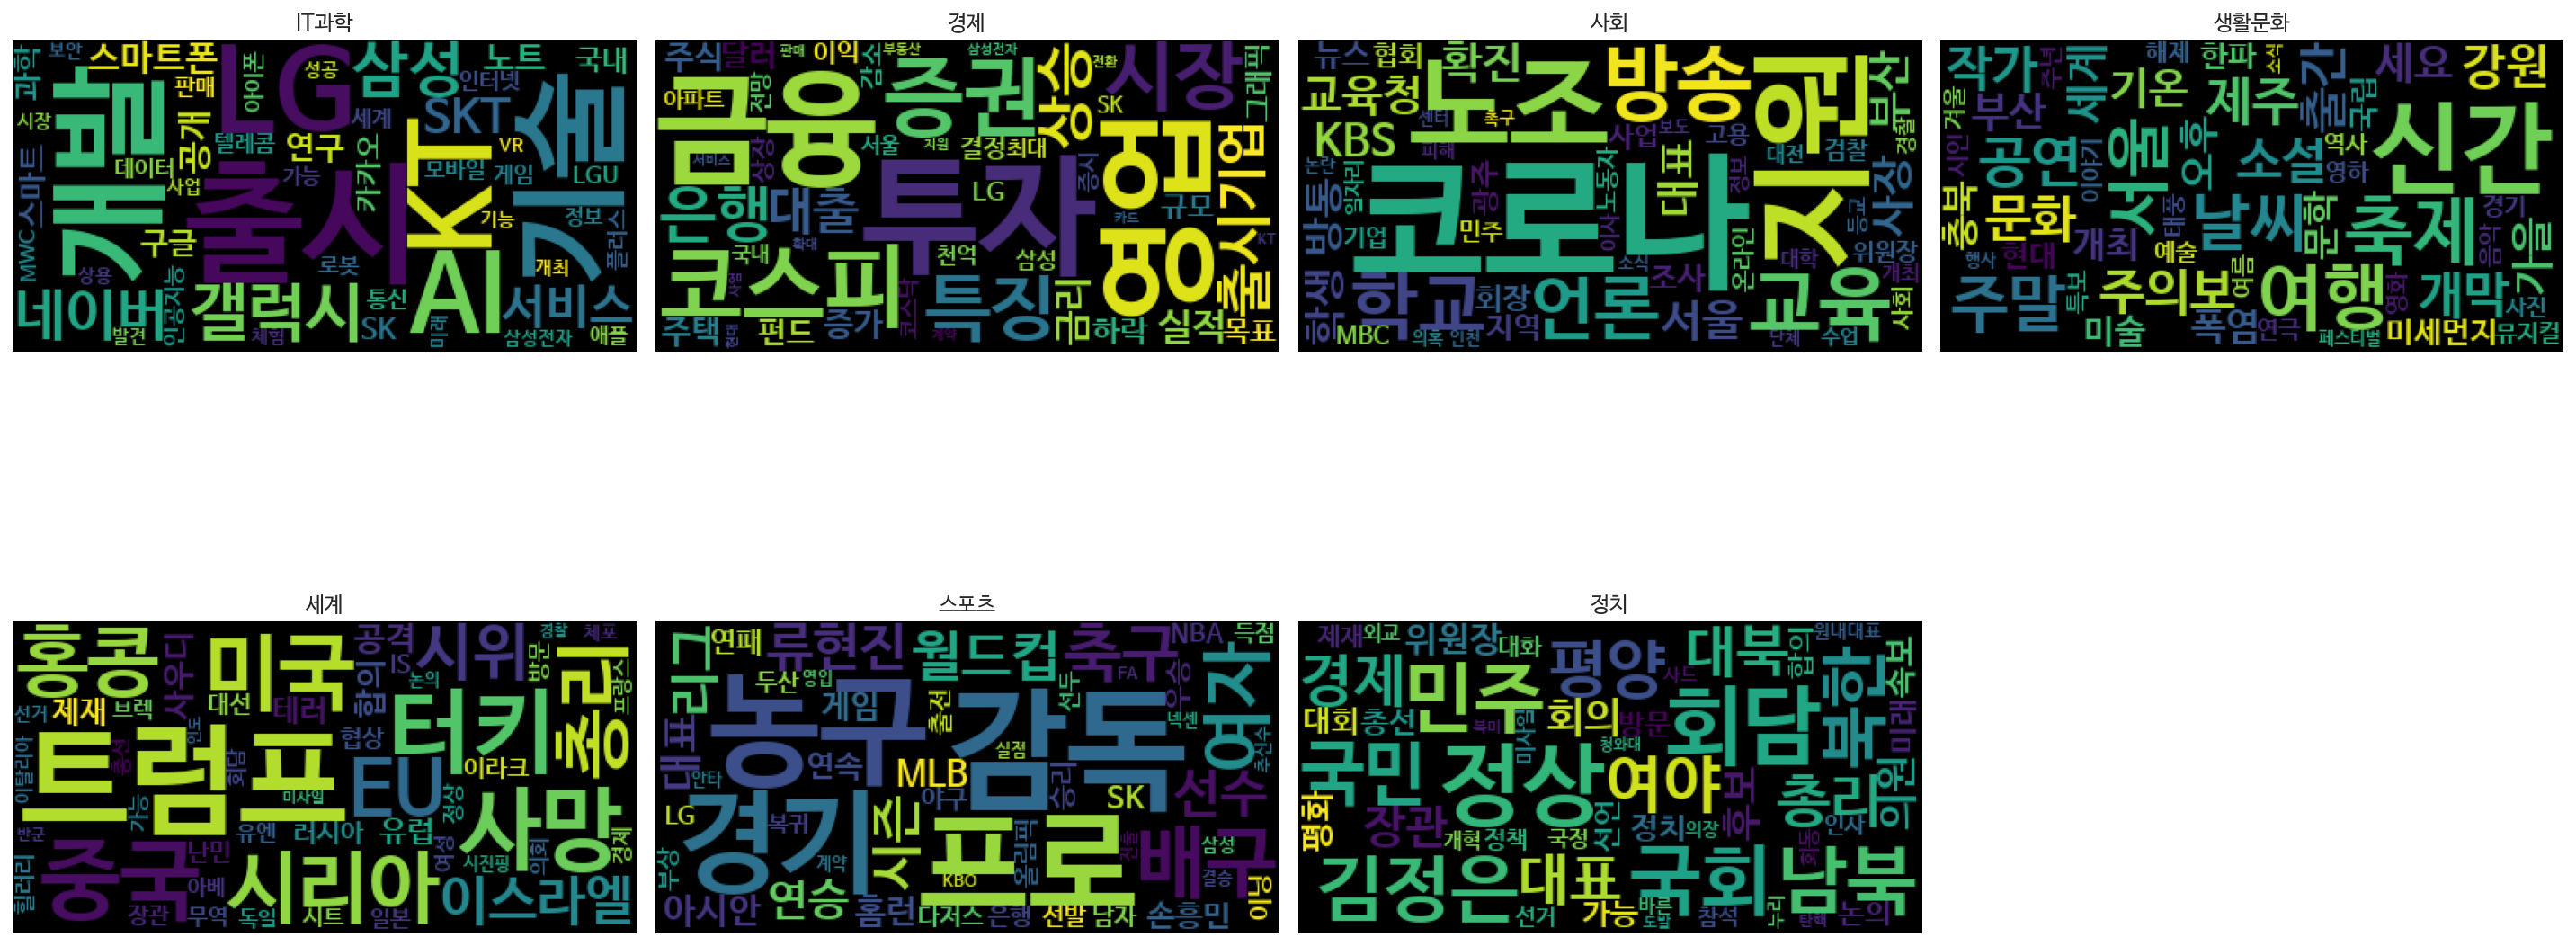

In [72]:
wc = WordCloud(background_color = 'black', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf')

fig, axes = plt.subplots(2,4,figsize = (20,10))  
ax = axes.flatten()
for i, row in enumerate(most_common2):
    wc.generate_from_frequencies(row)
    ax[i].axis('off')
    ax[i].imshow(wc)
    ax[i].set_title(f"{by_topic.index[i]}")


ax[-1].set_visible(False)  ## 남는 subplot 지우기
plt.tight_layout()
plt.show()

In [73]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


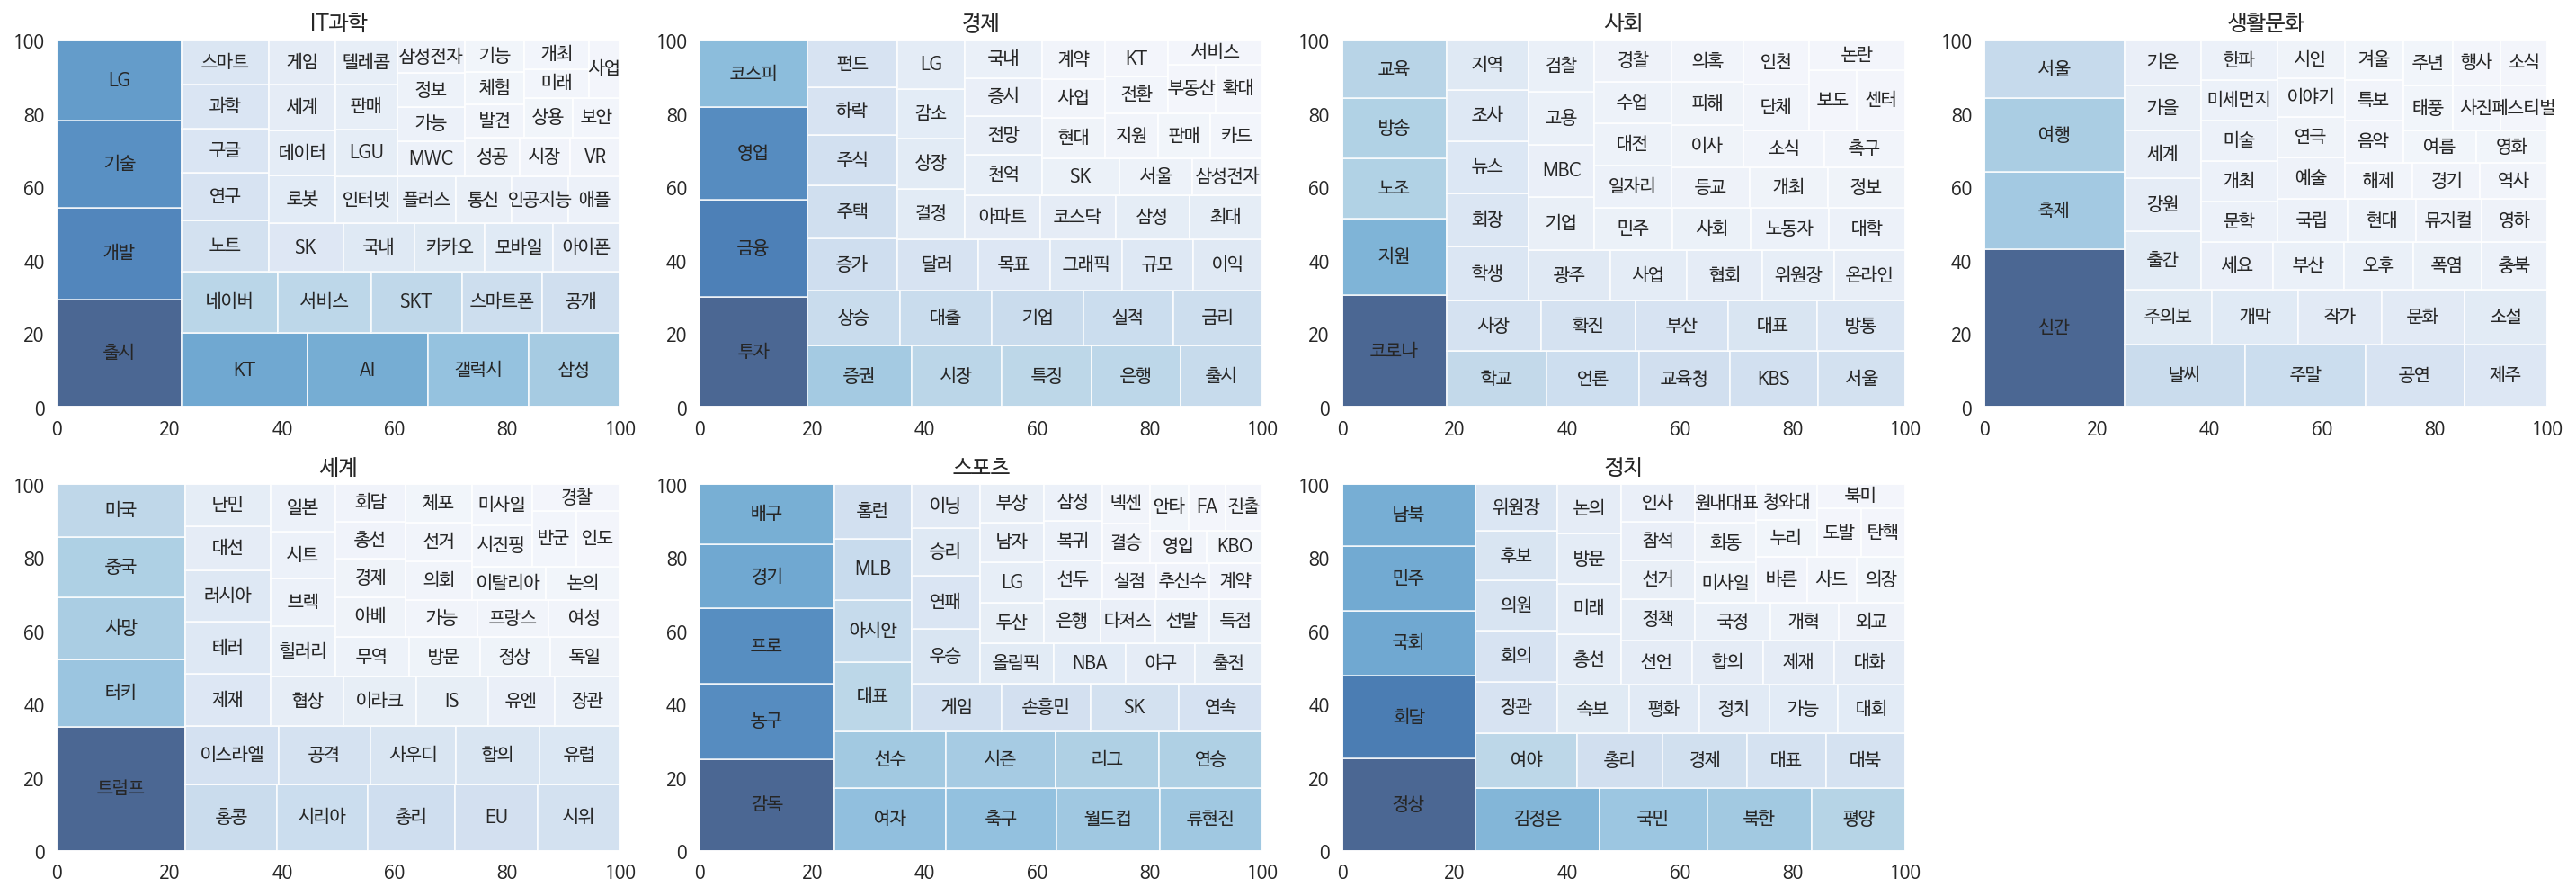

In [74]:
import squarify
import matplotlib as mpl

fig, axes = plt.subplots(2,4, figsize = (20,7))
ax = axes.flatten()

for i, row in enumerate(most_common2):

    norm = mpl.colors.Normalize(vmin = min(row.values()), vmax = max(row.values()))
    colors = [mpl.cm.Blues(norm(value)) for value in row.values()]
    
    ax[i].set_title(f'{by_topic.iloc[i].name}')
    squarify.plot(label = row.keys(),
                sizes = row.values(),
                color = colors, 
                alpha = .7, ax = ax[i])

ax[-1].set_visible(False)  ## 남는 subplot 지우기
plt.tight_layout()
plt.show();

 
* [Mecab POS tag](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)

### LDA 토픽모델링 
* LDA?
    - 각 document를 특정 비율의 topic의 집합으로 가정하고 ,각 topic은 다시 각 키워드의 일정 비율로 구성됨
    - 
* 패키지 - gensim


In [75]:
pos_cl = []
for row in train_mt['cleaned_title_morphs']:
    pos_clean =[]
    for w, t in row:
        # 일반명사, 고유명사, 외국어, 동사, 형용사, 어근 + 한글자 이상
        if t in ['NNG','NNP','SL','VV','VA','XR'] and len(w) > 1:  
            pos_clean.append(w)
    pos_cl.append(pos_clean)

#print(pos_cl)
train_mt['pos_cl'] = pos_cl


## 다시 string으로 만들기
cl = []
for row in pos_cl:
    cl.append(' '.join(row))
train_mt['title_pos_cl'] = cl

In [76]:
train_mt.tail(3)

title  topic_idx topic  \
45651     1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토          2    사회   
45652                   답변하는 배기동 국립중앙박물관장          2    사회   
45653  2020 한국인터넷기자상 시상식 내달 1일 개최…특별상 김성후          2    사회   

                            title_new  \
45651  보 서울시교육청 신종코로나 확산에 개학 연기 휴업 검토   
45652               답변하는 배기동 국립중앙박물관장   
45653   한국인터넷기자상 시상식 내달  일 개최 특별상 김성후   

                                        title_morphs  \
45651  [보, 서울시, 교육청, 신종, 코로나, 확산, 에, 개학, 연기, 휴업, 검토]   
45652                [답변, 하, 는, 배기동, 국립, 중앙, 박물, 관장]   
45653     [한국, 인터넷, 기자상, 시상식, 내달, 일, 개, 최, 특별상, 김성후]   

                                                                                                                       title_pos  \
45651  [(보, VV), (서울시, NNP), (교육청, NNG), (신종, NNP), (코로나, NNP), (확산, NNG), (에, JKB), (개학, NNG), (연기, NNG), (휴업, NNG), (검토, NNG)]   
45652                                    [(답변, NNG), (하, XSV), (는, ETM), (배기동, NNP), (국립, NNG), (중앙, NNG), (박물, NNG), (관장, NNG)]   
45653           [(한국, NNP), (인터넷, NNG), (기자상, NNG), (시상식, NNG), (내달, NNG), (일, NR), (개, NNBC), (최, XPN), (특별상, NNG), (김성후, NNP)]   

                                                                                         cleaned_title_morphs  \
45651  [(서울시, NNP), (교육청, NNG), (신종, NNP), (코로나, NNP), (확산, NNG), (개학, NNG), (연기, NNG), (휴업, NNG), (검토, NNG)]   
45652                                     [(답변, NNG), (배기동, NNP), (국립, NNG), (중앙, NNG), (박물, NNG), (관장, NNG)]   
45653                                            [(인터넷, NNG), (기자상, NNG), (시상식, NNG), (특별상, NNG), (김성후, NNP)]   

                               cleaned_title_w  \
45651  [서울시, 교육청, 신종, 코로나, 확산, 개학, 연기, 휴업, 검토]   
45652                [답변, 배기동, 국립, 중앙, 박물, 관장]   
45653                [인터넷, 기자상, 시상식, 특별상, 김성후]   

                                        pos_cl                   title_pos_cl  
45651  [서울시, 교육청, 신종, 코로나, 확산, 개학, 연기, 휴업, 검토]  서울시 교육청 신종 코로나 확산 개학 연기 휴업 검토  
45652                [답변, 배기동, 국립, 중앙, 박물, 관장]             답변 배기동 국립 중앙 박물 관장  
45653                [인터넷, 기자상, 시상식, 특별상, 김성후]            인터넷 기자상 시상식 특별상 김성후

In [77]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* perplexity
    -  언어모델의 분기계수(branching factor)
        - 분기계수는 이전단어로 다음 단어를 예측할 때 몇개의 단어 후보를 고려하는지를 의미함
        - 단어 후보가 많다는 것은 언어모델이 쉽게 정답을 내지 못한다는 것을 의미하므로 성능이 낮다고 할 수 있음 
* ***Perplexity 값은 낮을수록 언어모델의 성능이 우수함***

    - '당혹감', '혼란'
        - 언어모델의 Generation 성능을 판단할 수 있는 지표
        - 문장에 대한 Generation probability의 역수의 기하평균을 구한다는 것으로, 이는 Perplexity가 문장 생성 확률의 역수를 단어의 수로 정규화 함을 의미함
        - 문장 발생확률의 역수 == 발생할 수 있는 가짓수
        - **Perplexity가 높다는 것은 "발생할 수 있는 문장의 가짓수가 많다" = "혼란스럽다" = "원하는 결과를 얻지 못할 가능성이 크다"**

* ***문장의 발생 확률이 높을수록 해당 문장에 대한 Perplexity 값은 낮아짐***



(https://supkoon.tistory.com/41)
(https://heytech.tistory.com/344)

In [78]:
from gensim.models.ldamodel import LdaModel, CoherenceModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format = '%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO)

In [79]:
# bag of words 를 만들기 위해 사전 만들기
dictionary = corpora.Dictionary(pos_cl)

2022-06-07 23:38:50,093 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-06-07 23:38:50,242 : INFO : adding document #10000 to Dictionary(10341 unique tokens: ['결항', '분통', '여행객', '인천', '핀란드']...)
2022-06-07 23:38:50,384 : INFO : adding document #20000 to Dictionary(14415 unique tokens: ['결항', '분통', '여행객', '인천', '핀란드']...)
2022-06-07 23:38:50,530 : INFO : adding document #30000 to Dictionary(18373 unique tokens: ['결항', '분통', '여행객', '인천', '핀란드']...)
2022-06-07 23:38:50,689 : INFO : adding document #40000 to Dictionary(23206 unique tokens: ['결항', '분통', '여행객', '인천', '핀란드']...)
2022-06-07 23:38:50,784 : INFO : built Dictionary(25367 unique tokens: ['결항', '분통', '여행객', '인천', '핀란드']...) from 45654 documents (total 293116 corpus positions)


In [80]:
## dictionary filtering ==> 너무 흔하거나 너무 독특한 단어 제외
# 빈도가 2이상인 단어와 전체의 50% 이상 차지하는 단어 필터링
dictionary.filter_extremes(no_below = 2, no_above = 0.5)
corpus = [dictionary.doc2bow(row) for row in pos_cl]
print(corpus[5])

2022-06-07 23:38:50,839 : INFO : discarding 9540 tokens: [('WMO', 1), ('홍등가', 1), ('망하', 1), ('쪼개지', 1), ('사하', 1), ('성수', 1), ('재완', 1), ('사망률', 1), ('고위층', 1), ('따내', 1)]...
2022-06-07 23:38:50,840 : INFO : keeping 15827 tokens which were in no less than 2 and no more than 22827 (=50.0%) documents
2022-06-07 23:38:50,867 : INFO : resulting dictionary: Dictionary(15827 unique tokens: ['결항', '분통', '여행객', '인천', '핀란드']...)


[(37, 1), (38, 1), (39, 1), (40, 1), (41, 1)]


* num_topics: 생성될 토픽의 개수

* chunksize: 한번의 트레이닝에 처리될 문서의 개수

* passes: 전체 코퍼스 트레이닝 횟수

* interations: 문서 당 반복 횟수

- 모델의 정확도는 토픽의 일관성으로 볼 수 있음
- 토픽의 일관성은 coherence를 보면 됨
- 파라미터 eval_every = 1로 설정하여 매 pass 마다 문서의 convergence를 평가하고 대부분의 문서가 포함되는 pass를 선정할 수 있음 

In [81]:
## 모델링
## parameter 중 num_topics, chunksize, passes, interactions, eval_every 필수 조정
'''
class gensim.models.ldamodel.LdaModel(
    corpus=None, num_topics=100, id2word=None, distributed=False, chunksize=2000, 
    passes=1, update_every=1, alpha='symmetric', eta=None, decay=0.5, offset=1.0, 
    eval_every=10, iterations=50, gamma_threshold=0.001, minimum_probability=0.01, 
    random_state=None, ns_conf=None, minimum_phi_value=0.01, per_word_topics=False, 
    callbacks=None, dtype=<class 'numpy.float32'>)
'''

"\nclass gensim.models.ldamodel.LdaModel(\n    corpus=None, num_topics=100, id2word=None, distributed=False, chunksize=2000, \n    passes=1, update_every=1, alpha='symmetric', eta=None, decay=0.5, offset=1.0, \n    eval_every=10, iterations=50, gamma_threshold=0.001, minimum_probability=0.01, \n    random_state=None, ns_conf=None, minimum_phi_value=0.01, per_word_topics=False, \n    callbacks=None, dtype=<class 'numpy.float32'>)\n"

In [103]:
num_topics = 7
chunksize = 5000
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2022-06-07 23:55:08,626 : INFO : using autotuned alpha, starting with [0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715]
2022-06-07 23:55:08,633 : INFO : using serial LDA version on this node
2022-06-07 23:55:08,648 : INFO : running online (multi-pass) LDA training, 7 topics, 20 passes over the supplied corpus of 45654 documents, updating model once every 5000 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2022-06-07 23:55:08,651 : INFO : PROGRESS: pass 0, at document #5000/45654
2022-06-07 23:55:10,452 : INFO : optimized alpha [0.112307355, 0.11081293, 0.11278993, 0.11675284, 0.10817887, 0.110936314, 0.11451836]
2022-06-07 23:55:10,457 : INFO : merging changes from 5000 documents into a model of 45654 documents
2022-06-07 23:55:10,470 : INFO : topic #4 (0.108): 0.010*"EU" + 0.009*"트럼프" + 0.007*"터키" + 0.006*"난민" + 0.006*"시트" + 0.006*"브렉" + 0.006*"사망" + 0.006*"협상" + 0.005*"공격" + 0.005*"합의"
202

* coherence
    - '일관성'
    - 토픽 모델링 결과로 나온 주제들에 대해 각 주제에서 상위 N개의 단어를 뽑고, 상위 단어단의 유사도를 계산함 
    - 유사도가 높을수록(의미론적 일관성이 높을수록) 모델링이 잘 되었다고 평가함



In [104]:
top_topics = model.top_topics(corpus) #, num_words=20

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

2022-06-07 23:57:17,580 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2022-06-07 23:57:17,587 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2022-06-07 23:57:17,592 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2022-06-07 23:57:17,597 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2022-06-07 23:57:17,603 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2022-06-07 23:57:17,608 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2022-06-07 23:57:17,613 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2022-06-07 23:57:17,617 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2022-06-07 23:57:17,623 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2022-06-07 23:57:17,628 : INFO : CorpusAccumulator accumulated stats from 10000 documents
2022-06-07 23:57:17,633 : INFO : CorpusAccumulator accumulated stats from 11000 documents
2022-06-07 23:57:17

Average topic coherence: -12.4647.
[([(0.028652953, '코로나'),
   (0.014223855, '서울'),
   (0.01392634, '지원'),
   (0.012227175, '확진'),
   (0.00898757, 'LG'),
   (0.008416363, '투자'),
   (0.008075222, '금융'),
   (0.0077189007, '감독'),
   (0.0076991115, '기업'),
   (0.0076713203, '노동자'),
   (0.007624542, '시장'),
   (0.007580378, '소식'),
   (0.0074940845, '학생'),
   (0.007393166, '사업'),
   (0.007098703, '지역'),
   (0.007041883, '확대'),
   (0.0070374818, '삼성'),
   (0.0067950725, '그래픽'),
   (0.0065770117, '개최'),
   (0.006418508, '세계')],
  -8.428574451320278),
 ([(0.015365605, '부산'),
   (0.012398704, '민주'),
   (0.01003903, '조사'),
   (0.009520427, '회장'),
   (0.008998107, '대전'),
   (0.008377502, '방송'),
   (0.0074816193, '위원장'),
   (0.007478787, '교육청'),
   (0.0073496257, '전북'),
   (0.0073444834, '충북'),
   (0.007238936, '협회'),
   (0.0069981576, '의혹'),
   (0.006927855, '경찰'),
   (0.0063000633, '관련'),
   (0.0062235487, '운영'),
   (0.0060827723, '단체'),
   (0.006026851, '서울시'),
   (0.0059439074, '사망'),
   (0.00575

In [105]:
cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print("Cpherence",coherence)
print('\nPerplexity: ', model.log_perplexity(corpus))

2022-06-07 23:57:17,948 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2022-06-07 23:57:17,956 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2022-06-07 23:57:17,964 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2022-06-07 23:57:17,969 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2022-06-07 23:57:17,974 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2022-06-07 23:57:17,983 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2022-06-07 23:57:17,988 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2022-06-07 23:57:17,994 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2022-06-07 23:57:18,000 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2022-06-07 23:57:18,005 : INFO : CorpusAccumulator accumulated stats from 10000 documents
2022-06-07 23:57:18,012 : INFO : CorpusAccumulator accumulated stats from 11000 documents
2022-06-07 23:57:18

Cpherence -12.464715833319824


2022-06-07 23:57:25,386 : INFO : -8.827 per-word bound, 454.3 perplexity estimate based on a held-out corpus of 45654 documents with 283547 words



Perplexity:  -8.827471122307797


In [106]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
### 시각화
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


In [108]:
lda_visualization = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_visualization, 'file_name.html')

In [109]:
##################################################################

In [111]:
coherences=[]
perplexities=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(10):
    
    ntopics, nwords = 7, 100
    if i==0:
        p=1
    else:
        p=i*5
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p)   
    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

2022-06-08 00:42:47,947 : INFO : using symmetric alpha at 0.14285714285714285
2022-06-08 00:42:47,953 : INFO : using symmetric eta at 0.14285714285714285
2022-06-08 00:42:47,958 : INFO : using serial LDA version on this node
2022-06-08 00:42:47,975 : INFO : running online (single-pass) LDA training, 7 topics, 1 passes over the supplied corpus of 45654 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 400x with a convergence threshold of 0.001000
2022-06-08 00:42:47,976 : INFO : PROGRESS: pass 0, at document #2000/45654
2022-06-08 00:42:48,695 : INFO : merging changes from 2000 documents into a model of 45654 documents
2022-06-08 00:42:48,708 : INFO : topic #1 (0.143): 0.014*"트럼프" + 0.009*"홍콩" + 0.007*"일본" + 0.006*"정상" + 0.006*"무역" + 0.005*"푸틴" + 0.005*"논의" + 0.005*"터키" + 0.005*"외무" + 0.005*"시트"
2022-06-08 00:42:48,711 : INFO : topic #3 (0.143): 0.011*"미국" + 0.009*"트럼프" + 0.009*"홍콩" + 0.007*"중국" + 0.006*"사망" + 0.006*"사우디" + 0.005

Cpherence -13.275221017136593


2022-06-08 00:43:09,011 : INFO : -9.556 per-word bound, 752.7 perplexity estimate based on a held-out corpus of 45654 documents with 283547 words


Perplexity:  -9.55595495356889 




2022-06-08 00:43:18,915 : INFO : -9.556 per-word bound, 752.7 perplexity estimate based on a held-out corpus of 45654 documents with 283547 words
2022-06-08 00:43:18,918 : INFO : using symmetric alpha at 0.14285714285714285
2022-06-08 00:43:18,920 : INFO : using symmetric eta at 0.14285714285714285
2022-06-08 00:43:18,926 : INFO : using serial LDA version on this node
2022-06-08 00:43:18,942 : INFO : running online (multi-pass) LDA training, 7 topics, 5 passes over the supplied corpus of 45654 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 400x with a convergence threshold of 0.001000
2022-06-08 00:43:18,944 : INFO : PROGRESS: pass 0, at document #2000/45654
2022-06-08 00:43:19,644 : INFO : merging changes from 2000 documents into a model of 45654 documents
2022-06-08 00:43:19,659 : INFO : topic #5 (0.143): 0.019*"트럼프" + 0.013*"미국" + 0.009*"터키" + 0.009*"시리아" + 0.007*"반대" + 0.007*"러시아" + 0.006*"시위" + 0.006*"프랑스" + 0.006*"미사일" 

Cpherence -13.316144451581506


2022-06-08 00:44:12,021 : INFO : -9.279 per-word bound, 621.4 perplexity estimate based on a held-out corpus of 45654 documents with 283547 words


Perplexity:  -9.279472238149204 




2022-06-08 00:44:20,875 : INFO : -9.279 per-word bound, 621.4 perplexity estimate based on a held-out corpus of 45654 documents with 283547 words
2022-06-08 00:44:20,878 : INFO : using symmetric alpha at 0.14285714285714285
2022-06-08 00:44:20,880 : INFO : using symmetric eta at 0.14285714285714285
2022-06-08 00:44:20,886 : INFO : using serial LDA version on this node
2022-06-08 00:44:20,903 : INFO : running online (multi-pass) LDA training, 7 topics, 10 passes over the supplied corpus of 45654 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 400x with a convergence threshold of 0.001000
2022-06-08 00:44:20,906 : INFO : PROGRESS: pass 0, at document #2000/45654
2022-06-08 00:44:21,618 : INFO : merging changes from 2000 documents into a model of 45654 documents
2022-06-08 00:44:21,632 : INFO : topic #6 (0.143): 0.010*"홍콩" + 0.009*"러시아" + 0.007*"전쟁" + 0.007*"베네수엘라" + 0.006*"총리" + 0.005*"터키" + 0.005*"협상" + 0.005*"최대" + 0.005*"외무" 

Cpherence -12.333280868654615


2022-06-08 00:45:53,144 : INFO : -9.221 per-word bound, 597.0 perplexity estimate based on a held-out corpus of 45654 documents with 283547 words


Perplexity:  -9.221471617903244 




2022-06-08 00:46:01,794 : INFO : -9.221 per-word bound, 597.0 perplexity estimate based on a held-out corpus of 45654 documents with 283547 words
2022-06-08 00:46:01,798 : INFO : using symmetric alpha at 0.14285714285714285
2022-06-08 00:46:01,801 : INFO : using symmetric eta at 0.14285714285714285
2022-06-08 00:46:01,807 : INFO : using serial LDA version on this node
2022-06-08 00:46:01,826 : INFO : running online (multi-pass) LDA training, 7 topics, 15 passes over the supplied corpus of 45654 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 400x with a convergence threshold of 0.001000
2022-06-08 00:46:01,831 : INFO : PROGRESS: pass 0, at document #2000/45654
2022-06-08 00:46:02,557 : INFO : merging changes from 2000 documents into a model of 45654 documents
2022-06-08 00:46:02,572 : INFO : topic #5 (0.143): 0.018*"트럼프" + 0.010*"미국" + 0.009*"사망" + 0.007*"터키" + 0.007*"총리" + 0.006*"미사일" + 0.006*"홍콩" + 0.006*"시리아" + 0.006*"중국" +

Cpherence -12.92624014264961


2022-06-08 00:48:21,227 : INFO : -9.205 per-word bound, 590.0 perplexity estimate based on a held-out corpus of 45654 documents with 283547 words


Perplexity:  -9.204681728509529 




2022-06-08 00:48:30,157 : INFO : -9.205 per-word bound, 590.1 perplexity estimate based on a held-out corpus of 45654 documents with 283547 words
2022-06-08 00:48:30,160 : INFO : using symmetric alpha at 0.14285714285714285
2022-06-08 00:48:30,162 : INFO : using symmetric eta at 0.14285714285714285
2022-06-08 00:48:30,168 : INFO : using serial LDA version on this node
2022-06-08 00:48:30,186 : INFO : running online (multi-pass) LDA training, 7 topics, 20 passes over the supplied corpus of 45654 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 400x with a convergence threshold of 0.001000
2022-06-08 00:48:30,189 : INFO : PROGRESS: pass 0, at document #2000/45654
2022-06-08 00:48:30,935 : INFO : merging changes from 2000 documents into a model of 45654 documents
2022-06-08 00:48:30,951 : INFO : topic #5 (0.143): 0.017*"미국" + 0.011*"트럼프" + 0.009*"사망" + 0.008*"힐러리" + 0.008*"IS" + 0.006*"시리아" + 0.006*"중국" + 0.006*"이스라엘" + 0.006*"공격"

Cpherence -13.008545979833334


2022-06-08 00:51:35,537 : INFO : -9.153 per-word bound, 569.5 perplexity estimate based on a held-out corpus of 45654 documents with 283547 words


Perplexity:  -9.15343464164775 




2022-06-08 00:51:44,373 : INFO : -9.153 per-word bound, 569.5 perplexity estimate based on a held-out corpus of 45654 documents with 283547 words
2022-06-08 00:51:44,384 : INFO : using symmetric alpha at 0.14285714285714285
2022-06-08 00:51:44,389 : INFO : using symmetric eta at 0.14285714285714285
2022-06-08 00:51:44,396 : INFO : using serial LDA version on this node
2022-06-08 00:51:44,418 : INFO : running online (multi-pass) LDA training, 7 topics, 25 passes over the supplied corpus of 45654 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 400x with a convergence threshold of 0.001000
2022-06-08 00:51:44,423 : INFO : PROGRESS: pass 0, at document #2000/45654
2022-06-08 00:51:45,174 : INFO : merging changes from 2000 documents into a model of 45654 documents
2022-06-08 00:51:45,192 : INFO : topic #3 (0.143): 0.016*"미국" + 0.009*"트럼프" + 0.009*"대선" + 0.009*"중국" + 0.007*"홍콩" + 0.006*"사망" + 0.006*"시위" + 0.006*"러시아" + 0.006*"이스라엘" 

Cpherence -12.967233484618367


2022-06-08 00:55:42,400 : INFO : -9.124 per-word bound, 557.8 perplexity estimate based on a held-out corpus of 45654 documents with 283547 words


Perplexity:  -9.123705086668524 




스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2022-06-08 00:56:28,053 : INFO : topic #2 (0.143): 0.027*"여자" + 0.018*"정상" + 0.016*"홈런" + 0.015*"회담" + 0.012*"남북" + 0.011*"개최" + 0.010*"김정은" + 0.010*"연구" + 0.010*"미래" + 0.009*"다저스"
2022-06-08 00:56:28,058 : INFO : topic #1 (0.143): 0.038*"농구" + 0.025*"경기" + 0.019*"MLB" + 0.019*"류현진" + 0.016*"AI" + 0.011*"국회" + 0.010*"선발" + 0.009*"승리" + 0.009*"연속" + 0.007*"안타"
2022-06-08 00:56:28,060 : INFO : topic diff=0.160233, rho=0.193070
2022-06-08 00:56:28,062 : INFO : PROGRESS: pass 3, at document #26000/45654
2022-06-08 00:56:28,372 : INFO : merging changes from 2000 documents into a model of 45654 documents
2022-06-08 00:56:28,391 : INFO : topic #2 (0.143): 0.021*"여자" + 0.016*"연구" + 0.015*"정상" + 0.013*"홈런" + 0.012*"회담" + 0.012*"서비스" + 0.011*"개최" + 0.010*"미래" + 0.009*"성공" + 0.009*"남북"
2022-06-08 00:56:28,396 : INFO : topic #3 (0.143): 0.032*"KT" + 0.028*"삼성" + 0.024*"갤럭시" + 0.018*"개발" + 0.014*"노트" + 0.011*"스마트폰" + 0.010*"판매" + 0.010*"공개" + 0.009*"이닝" + 0.009*"

Cpherence -12.692404284595451


2022-06-08 01:00:41,631 : INFO : -9.109 per-word bound, 552.2 perplexity estimate based on a held-out corpus of 45654 documents with 283547 words


Perplexity:  -9.1090956540627 




2022-06-08 01:00:52,582 : INFO : -9.109 per-word bound, 552.2 perplexity estimate based on a held-out corpus of 45654 documents with 283547 words
2022-06-08 01:00:52,585 : INFO : using symmetric alpha at 0.14285714285714285
2022-06-08 01:00:52,587 : INFO : using symmetric eta at 0.14285714285714285
2022-06-08 01:00:52,594 : INFO : using serial LDA version on this node
2022-06-08 01:00:52,612 : INFO : running online (multi-pass) LDA training, 7 topics, 35 passes over the supplied corpus of 45654 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 400x with a convergence threshold of 0.001000
2022-06-08 01:00:52,615 : INFO : PROGRESS: pass 0, at document #2000/45654
2022-06-08 01:00:53,520 : INFO : merging changes from 2000 documents into a model of 45654 documents
2022-06-08 01:00:53,536 : INFO : topic #5 (0.143): 0.008*"트럼프" + 0.007*"러시아" + 0.007*"중국" + 0.007*"협상" + 0.006*"무역" + 0.004*"미국" + 0.004*"총리" + 0.004*"테러" + 0.004*"유럽" + 

KeyboardInterrupt: ignored

### 추가적으로 시도해볼 방법
* 통계적 기법 
    - TF-IDF
* 확률 기법
    - LDA 통해 잠재적 키워드 추출
* 딥러닝 활용

* 클러스터링 기법
    - K-means, 밀도기반 